# Let's import the required libraries

In [12]:

import pandas as pd
import sklearn
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pyaug import PyAugLinear, PyAugNormal, PyAugLogistic, PyAugLaplace
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, accuracy_score, recall_score

%matplotlib inline

In [13]:
df = pd.read_csv("./creditcard.csv")

In [17]:
df1=df

print('DataFrame Shape:', df.shape, '\n')
print('Number of NaN/Null Values:')
print(df.isna().sum(), '\n')
print('DataFrame Head:')

df.head()


DataFrame Shape: (284807, 31) 

Number of NaN/Null Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64 

DataFrame Head:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


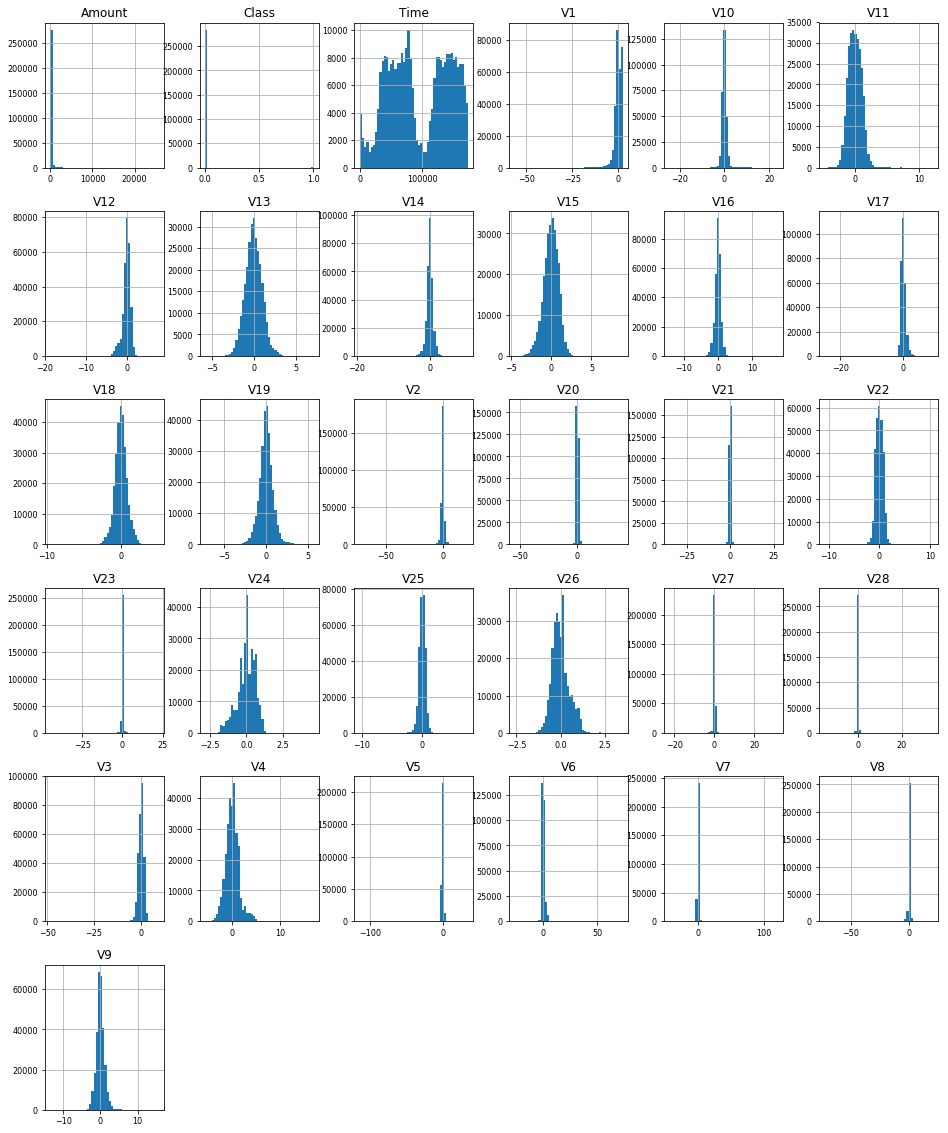

In [18]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

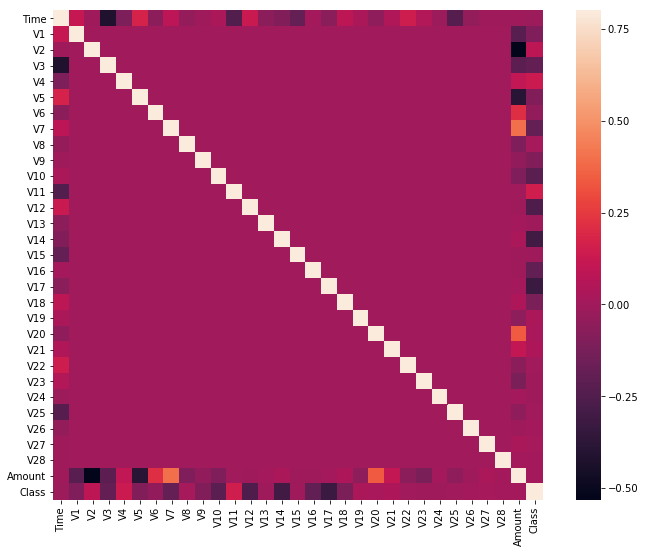

In [19]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix, vmax=0.8, square = True)
plt.show()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tools
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE
from scipy import stats

# Model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss

# Algorithms
from sklearn import ensemble,tree, svm, naive_bayes, neighbors, linear_model, gaussian_process, neural_network
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# Evaluation
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score, precision_score, precision_recall_curve

# System
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [7]:
df=pd.read_csv('./creditcard.csv')

In [9]:
print(df.shape)
print(df.columns)

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Frauds:  0.17 %


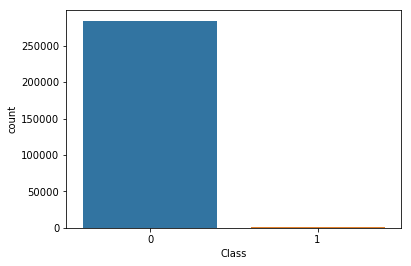

In [11]:
sns.countplot('Class', data=df)
print('Frauds: ', round(df['Class'].value_counts()[1] / len(df) * 100, 2), '%')

The dataset is highly imbalanced dataset. It's anomaly type actually.

In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [21]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0
284806,1.035022,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,2.724796,0


In [19]:
rs = RobustScaler()

df['Time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))
df['Amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))

In [20]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [22]:
df['Class'].value_counts()[1]  #count frauds

492

In [26]:
frauds = df.loc[df['Class'] == 1]
nonfrauds = df.loc[df['Class'] == 0][:492]

undersample = pd.concat([frauds, nonfrauds])

In [30]:
print(undersample.shape)
undersample.tail()

(984, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
487,-0.990789,-0.711928,1.547423,1.799759,2.489060,0.450497,1.073762,0.309374,0.450854,-1.560107,...,-0.115133,-0.136653,0.052595,-0.327937,-0.531480,0.005533,0.515896,0.250372,-0.296933,0
488,-0.990778,1.106251,0.398625,0.860421,2.388862,-0.365843,-0.192568,-0.121769,0.150876,-0.733271,...,-0.253189,-0.952836,0.181643,0.222462,0.083552,-0.342278,-0.017021,0.020976,-0.063858,0
489,-0.990778,-0.424666,0.554293,1.374234,-0.447451,0.288248,-1.082536,0.969035,-0.347446,-0.109678,...,-0.023296,0.103502,0.024513,0.425008,-0.227746,0.182264,0.076720,-0.098667,0.274436,0
490,-0.990766,1.261597,0.256346,0.513254,0.619054,-0.472482,-0.989342,0.065431,-0.208781,0.035924,...,-0.257305,-0.739810,0.135646,0.376418,0.220320,0.094706,-0.028559,0.019023,-0.289387,0
491,-0.990754,1.295406,0.296881,0.068725,0.572690,-0.165698,-0.781113,0.030953,-0.133051,0.165737,...,-0.330797,-0.980511,0.071340,-0.210547,0.266631,0.129970,-0.027766,0.023851,-0.294977,0


In [31]:
X = undersample.drop(['Class'], axis=1)
y = undersample['Class']

tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

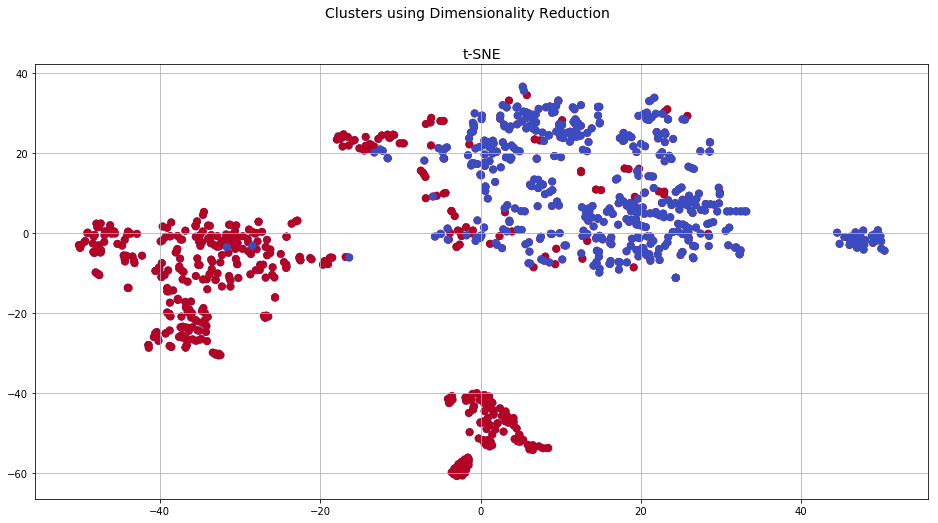

In [32]:
f, (ax1) = plt.subplots(1, 1, figsize=(16,8))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

# t-SNE scatter plot
ax1.scatter(tsne[:,0], tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(tsne[:,0], tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)

In [33]:
X = undersample.drop('Class', axis=1)
y = undersample['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert values into an array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    gaussian_process.GaussianProcessClassifier(),
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    linear_model.Perceptron(),
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(),
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    xgb.XGBClassifier()
    ]

In [34]:
col = []
algorithms = pd.DataFrame(columns = col)
idx = 0

#Train and score algorithms
for a in MLA:
    
    a.fit(X_train, y_train)
    pred = a.predict(X_test)
    acc = accuracy_score(y_test, pred) #Other way: a.score(X_test, y_test)
    f1 = f1_score(y_test, pred)
    cv = cross_val_score(a, X_train, y_train).mean()
    
    Alg = a.__class__.__name__
    
    algorithms.loc[idx, 'Algorithm'] = Alg
    algorithms.loc[idx, 'Accuracy'] = round(acc * 100, 2)
    algorithms.loc[idx, 'F1 Score'] = round(f1 * 100, 2)
    algorithms.loc[idx, 'CV Score'] = round(cv * 100, 2)

    idx+=1

In [35]:
algorithms.sort_values(by = ['CV Score'], ascending = False, inplace = True)    
algorithms.head()

,Algorithm,Accuracy,F1 Score,CV Score
0,AdaBoostClassifier,100.0,100.0,99.87
14,DecisionTreeClassifier,100.0,100.0,99.87
16,XGBClassifier,100.0,100.0,99.87
2,GradientBoostingClassifier,100.0,100.0,99.87
3,RandomForestClassifier,100.0,100.0,99.75


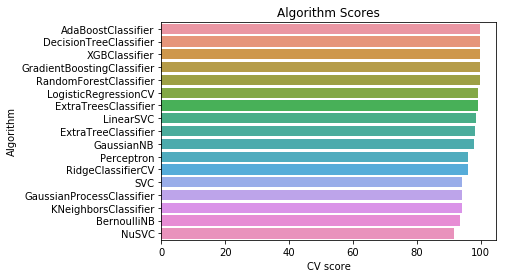

In [36]:
g = sns.barplot("CV Score", "Algorithm", data = algorithms)
g.set_xlabel("CV score")
g = g.set_title("Algorithm Scores")

In [37]:
# Train
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_train)

# Score
print('XGBoost classifier ROC AUC score: ', roc_auc_score(y_train, y_pred))

XGBoost classifier ROC AUC score:  1.0


In [38]:
X = df.drop('Class', axis=1)
y = df['Class']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
kfold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [42]:
xgb = XGBClassifier()
xgb.fit(original_Xtrain,original_ytrain)
cv_pred = cross_val_predict(xgb, original_Xtrain, original_ytrain, cv=kfold)

# Score
print('XGBoost classifier ROC AUC score: ', roc_auc_score(original_ytrain, cv_pred))

XGBoost classifier ROC AUC score:  0.8870008806716378


227845

# Evaluate

ROC AUC

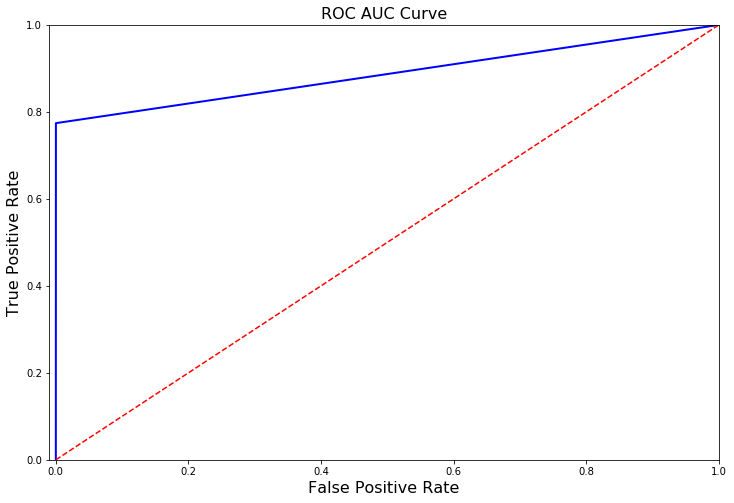

In [45]:
fpr, tpr, thresold = roc_curve(original_ytrain, cv_pred)

def logistic_roc_curve(fpr, tpr):
    plt.figure(figsize=(12,8))
    plt.title('ROC AUC Curve', fontsize=16)
    plt.plot(fpr, tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(fpr, tpr)
plt.show()

In [46]:
print('ROC AUC score: ', roc_auc_score(original_ytrain, cv_pred))

ROC AUC score:  0.8870008806716378


# Confusion Matrix

In [47]:
confusion_matrix(original_ytrain, cv_pred)

array([[227426,     25],
       [    89,    305]])

# Precision-Recall Cureve

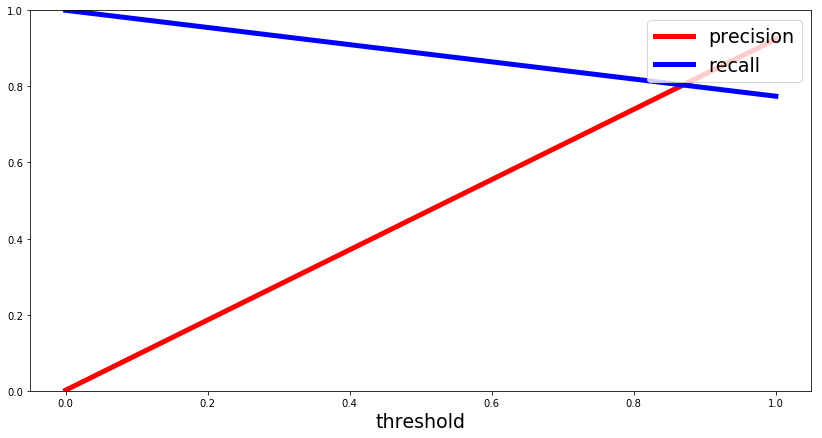

In [48]:
precision, recall, threshold = precision_recall_curve(original_ytrain, cv_pred)

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [49]:
print("Precision:", precision_score(original_ytrain, cv_pred))
print("Recall:",recall_score(original_ytrain, cv_pred))

Precision: 0.9242424242424242
Recall: 0.7741116751269036


# Fraud Detection:  Autoencoder in keras

In [50]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
import tensorflow as tf

In [51]:
train_x, test_x = train_test_split(df,test_size = 0.3,random_state=42)
train_x = train_x[train_x.Class == 0] 
train_x = train_x.drop(['Class'], axis=1) 


test_y = test_x['Class']
test_x = test_x.drop(['Class'], axis=1)
print(train_x.shape)

(199008, 30)


Our Autoencoder uses 4 Desnse (fully connected) layers with 14, 7, 7 and 30 neurons respectively. The first two layers are used for our encoder, the last two go for the decoder.

In [52]:
input_dim = train_x.shape[1]
encoding_dim = int(input_dim / 2) - 1
hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-7

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

Instructions for updating:
Colocations handled automatically by placer.


We will train our model for 100 epochs with a batch size of 128 samples

In [1]:
nb_epoch = 10
batch_size = 128

In [ ]:
#We will use Model Checkpoint to save the best model and TensorBoard for graph visualization

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(train_x, train_x,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_x, test_x),
                    verbose=1,
                    callbacks=[cp, tb]).history

Instructions for updating:
Use tf.cast instead.
Train on 199008 samples, validate on 85443 samples
Epoch 1/100
199008/199008 [==============================] - 10s 50us/step - loss: 1.1460 - acc: 0.5181 - val_loss: 0.9522 - val_acc: 0.6101
Epoch 2/100
199008/199008 [==============================] - 9s 46us/step - loss: 0.9658 - acc: 0.6243 - val_loss: 0.8781 - val_acc: 0.6276
Epoch 3/100
199008/199008 [==============================] - 8s 41us/step - loss: 0.9059 - acc: 0.6445 - val_loss: 0.8423 - val_acc: 0.6463
Epoch 4/100
199008/199008 [==============================] - 9s 45us/step - loss: 0.8733 - acc: 0.6546 - val_loss: 0.8191 - val_acc: 0.6554
Epoch 5/100
199008/199008 [==============================] - 9s 44us/step - loss: 0.8526 - acc: 0.6603 - val_loss: 0.8051 - val_acc: 0.6616
Epoch 6/100
199008/199008 [==============================] - 9s 45us/step - loss: 0.8390 - acc: 0.6650 - val_loss: 0.7995 - val_acc: 0.6563
Epoch 7/100
199008/199008 [==============================] -

In [ ]:
autoencoder = load_model('autoencoder_fraud.h5')

In [ ]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
pred = autoencoder.predict(test_x)

In [ ]:
mse = np.mean(np.power(test_x - pred, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_y})

print(error_df)

In [2]:
threshold_fixed = 5
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
matrix = confusion_matrix(error_df.True_class, pred_y)

tpos = matrix[0][0]
fneg = matrix[1][1]
fpos = matrix[0][1]
tneg = matrix[1][0]

print( 'Accuracy: '+ str(np.round(100*float(tpos+fneg)/float(tpos+fneg + fpos + tneg),2))+'%')
print( 'Cohen Kappa: '+ str(np.round(cohen_kappa_score(error_df.True_class, pred_y),3)))
print("Sensitivity/Recall for Model : {}".format(round(recall_score(error_df.True_class, pred_y), 2)))
print("F1 Score for Model : {}".format(round(f1_score(error_df.True_class, pred_y), 2)))

NameError: name 'df' is not defined